In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [9]:
corr = df.corr()

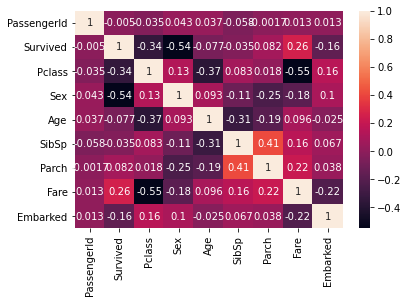

In [10]:
import seaborn as sns
sns.heatmap(corr , annot=True)

In [11]:
import seaborn as sns

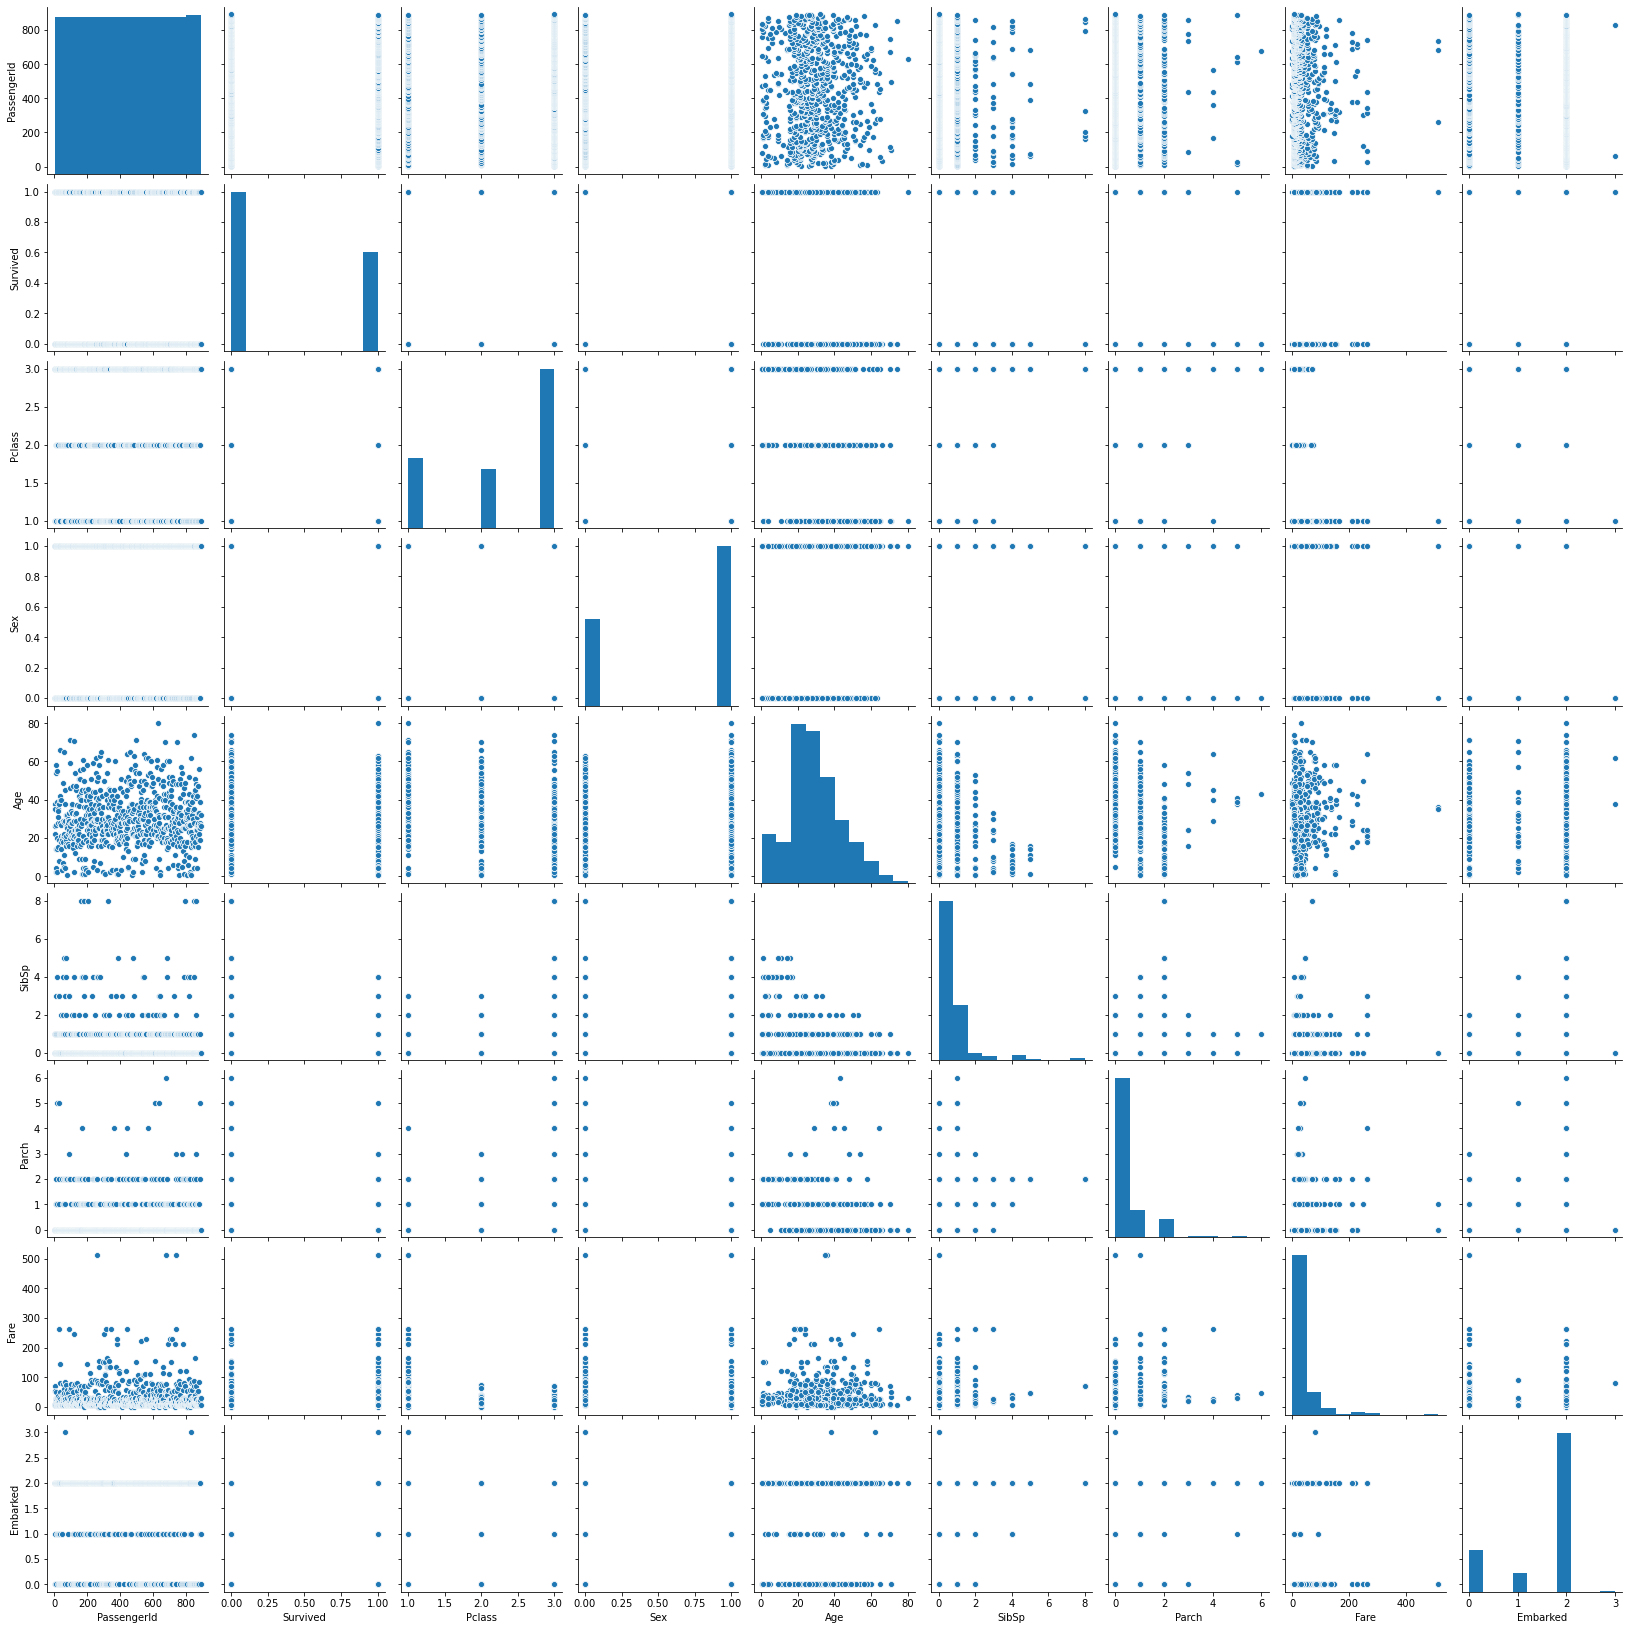

In [12]:
sns.pairplot(df)

In [25]:
x = df[['Pclass','Sex','SibSp',"Parch","Fare","Embarked"]]

In [26]:
y = df["Survived"]

In [28]:
df.drop(['Age'], axis=1, inplace=True)

KeyError: "['Age'] not found in axis"

In [29]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,2
887,888,1,1,0,0,0,30.0000,2
888,889,0,3,0,1,2,23.4500,2
889,890,1,1,1,0,0,30.0000,0


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [31]:
feat_imp =pd.Series(model.feature_importances_, index=x.columns)
feat_imp

Pclass      0.132076
Sex         0.380641
SibSp       0.046268
Parch       0.058188
Fare        0.338584
Embarked    0.044243
dtype: float64

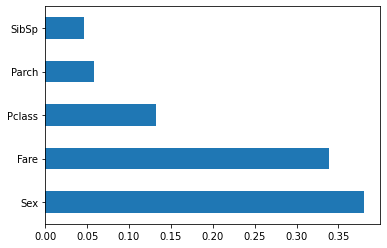

In [33]:
import matplotlib.pyplot as plt 
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Testing Model 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [38]:
LGC = LogisticRegression(solver='lbfgs',fit_intercept=False,warm_start=True)
LGC.fit(x_train,y_train)

LogisticRegression(fit_intercept=False, warm_start=True)

In [40]:
y_pred_lg = LGC.predict(x_test)

In [41]:
print(accuracy_score(y_test,y_pred_lg))
print(classification_report(y_test,y_pred_lg))
print(confusion_matrix(y_test,y_pred_lg))

0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       102
           1       0.83      0.68      0.74        77

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[91 11]
 [25 52]]


In [42]:
gb = GradientBoostingClassifier(max_depth=3, validation_fraction=3,loss='exponential')
gb.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', validation_fraction=3)

In [50]:
y_pred_gb = gb.predict(x_test)
y_pred_gb

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [45]:
print(accuracy_score(y_test,y_pred_lg))
print(classification_report(y_test,y_pred_lg))
print(confusion_matrix(y_test,y_pred_lg))

0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       102
           1       0.83      0.68      0.74        77

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[91 11]
 [25 52]]


In [48]:
final_data_1 = {'PassengerId': df.PassengerId, 'Survived': y_pred_gb}

In [57]:
y_pred_gb.reshape(179)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [60]:
df.PassengerId.shape

(891,)

In [65]:
a_series = pd.Series(df.PassengerId)

In [66]:
another_series = pd.Series(y_pred_gb)

In [68]:
dff = pd. concat([a_series, another_series], axis=1)

In [75]:
submission_1 = pd.DataFrame(data=dff)

In [76]:
submission_1.to_csv('submission_lrc.csv',index =False)